In [13]:
import numpy as np

In [14]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt

In [16]:
import random

In [17]:
import math

In [18]:
data = pd.read_csv("Datasets/clustering_points.csv")
data

,Ft1,Ft2,Cluster
0,-81.600565,-51.253154,2
1,-51.289427,98.361886,0
2,-71.253703,-71.528332,2
3,56.149986,18.261123,1
4,-19.383071,101.498518,0
...,...,...,...
395,46.643890,24.711680,1
396,31.917945,5.657059,1
397,-68.080610,-73.577670,2
398,-8.767863,75.841448,0


In [19]:
k = 3

In [20]:
def distance_between_two_points(A, B):
    return ((A[0] - B[0]) ** 2 + (A[1] - B[1]) ** 2) ** (1 / 2)

In [21]:
def get_the_nearest_cluster_centroid_index(i, centroids, k):
    distances = []
    for j in range(k):
        distances.append(distance_between_two_points(centroids[j], [data.iloc[i, 0], data.iloc[i, 1]]))
    return distances.index(min(distances))

In [22]:
def update_cluster_centroids(centroids, c_indices):
    local_centroids = centroids[:]
    for j in range(len(local_centroids)):
        x, y = 0, 0
        for i in range(data.shape[0]):
            if c_indices[i] == j:
                x, y = x + data.iloc[i, 0], y + data.iloc[i, 1]
        try:
            x, y = x / c_indices.count(j), y / c_indices.count(j)
        except ZeroDivisionError:
            return False
        local_centroids[j] = (x, y)
    return local_centroids

In [23]:
def distortion_function(c_indices, centroids):
    res = 0
    for i in range(400):
        res += (distance_between_two_points(centroids[c_indices[i]], [data.iloc[i, 0], data.iloc[i, 1]])) ** 2
    return 1/data.shape[0] * res

In [24]:
def K_means(k):
    centroid_indices = random.sample(list(data.index), k)
    centroids = [
        (data.iloc[centroid_indices[i], 0],
         data.iloc[centroid_indices[i], 1])
         for i in range(k)
    ]
    for _ in range(100):
        c_indices = []
        for i in range(data.shape[0]):
            c_indices.append(get_the_nearest_cluster_centroid_index(i, centroids, k))
        centroids = update_cluster_centroids(centroids, c_indices)
        if not centroids:
            return False
    distortion = distortion_function(c_indices, centroids)
    if distortion < K_means.min_distortion_function:
        K_means.min_distortion_function = distortion
        K_means.min_centroids = centroids[:]
        K_means.min_c_indices = c_indices[:]
K_means.min_distortion_function = math.inf
K_means.min_centroids = []
K_means.min_c_indices = []
for _ in range(10):
    K_means(k)
print("The lowest distortion function is", K_means.min_distortion_function)
print("Centroids are", K_means.min_centroids)
print("Indices are", K_means.min_c_indices)

The lowest distortion function is 192.38311408290505
Centroids are [(-25.878577355878488, 90.49949214291385), (-69.16652715418095, -68.35146816048734), (46.71991692664884, 19.082692474563775)]
Indices are [1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1,

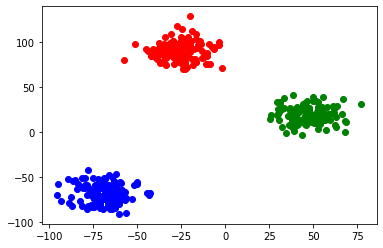

In [25]:
colors = ["red", "blue", "green"]
for i in range(data.shape[0]):
    plt.scatter(data.iloc[i, 0], data.iloc[i, 1], color=colors[K_means.min_c_indices[i]])